In [1]:
import bagpy
from bagpy import bagreader

In [2]:
#stationary_open = bagreader('./Data/stationary_open.bag')
#stationary_occulded = bagreader('./Data/stationary_2023-02-03-16-46-11.bag')
#walking_open = bagreader('./Data/walking.bag')

In [3]:
#stationary_open.topic_table

In [4]:
#gps_data_op = stationary_open.message_by_topic('/gps')
#gps_data_oc = stationary_occulded.message_by_topic('/gps')
#gps_data_wa = walking_open.message_by_topic('/gps')

In [5]:
import pandas as pd
gps_df_op = pd.read_csv('stationary_open/gps.csv')
gps_df_oc = pd.read_csv('stationary_2023-02-03-16-46-11/gps.csv')
gps_df_wa = pd.read_csv('walking/gps.csv')

In [6]:
gps_df_op.head()

,Time,Header.seq,Header.stamp.secs,Header.stamp.nsecs,Header.frame_id,Latitude,Longitude,Altitude,HDOP,UTM_easting,UTM_northing,UTC,Zone,Letter
0,1.675378e+09,16,224739,0,GPS1_Frame,42.307503,-71.107712,19.2 M,1.2,326283.21875,4686070.0,224739.0,19,T
1,1.675378e+09,17,224740,0,GPS1_Frame,42.307503,-71.107712,19.2 M,1.2,326283.21875,4686070.0,224740.0,19,T
2,1.675378e+09,18,224741,0,GPS1_Frame,42.307503,-71.107712,19.2 M,1.2,326283.21875,4686070.0,224741.0,19,T
3,1.675378e+09,19,224742,0,GPS1_Frame,42.307503,-71.107712,19.2 M,1.2,326283.21875,4686070.0,224742.0,19,T
4,1.675378e+09,20,224743,0,GPS1_Frame,42.307503,-71.107712,19.2 M,1.2,326283.21875,4686070.0,224743.0,19,T


## Analysis of stationary data from open field
Location - Scagnoli-Nihill Athletic Complex in Jamaica Plains

From google maps -> lat = 42.30775, lon = -71.10752
***

In [7]:
# Location - Scagnoli-Nihill Athletic Complex in Jamaica Plains
# From google maps -> lat = 42.30775, lon = -71.10752

known_lat, known_lon = 42.30775, -71.10752

import utm

utm_converted = utm.from_latlon(42.30775,-71.10752)

known_easting,known_northing,known_zone,known_letter = utm_converted[0],utm_converted[1],utm_converted[2],utm_converted[3]

In [8]:
# Scaling data
gps_df_op['modified_northing'] = gps_df_op['UTM_northing'] - gps_df_op.UTM_northing[0]
gps_df_op['modified_easting'] = gps_df_op['UTM_easting'] - gps_df_op.UTM_easting[0]

In [9]:
import plotly.express as px
# Scatterplots of the Northing vs. Easting data
fig = px.scatter(gps_df_op, x="modified_northing", y="modified_easting", labels={"modified_northing": "Northing (M)", "modified_easting": "Easting (M)"}, title="Open Space")
fig.show()

# Range of position
northing - (0,1)
easting - (-0.4,0)
***

In [10]:
# Comparision between gps and google map position
x = known_northing - gps_df_op.UTM_northing[0]
y = known_easting - gps_df_op.UTM_easting[0]
fig.add_scatter(x=[x],y=[y],name='Actual position')
fig.show()

# HDOP value - 1.2

In [11]:
gps_df_op['HDOP'].unique()

array([1.20000005])

In [12]:
gps_df_op['modified_northing'].unique()

array([0. , 0.5, 1. ])

In [13]:
gps_df_op['modified_easting'].unique()

array([ 0.     ,  0.03125, -0.125  , -0.25   , -0.375  ])

From the scatter plot we can observe that the data collected from GPS puck has a decent precision in temrs of position. We can assume that, since the HDOP value was greater than 1 some error in precision may occur.
***

In [14]:
# Calculating error in terms of position using eucledian distance
import math
gps_df_op['error'] = ((gps_df_op['modified_northing']-x)**2 + (gps_df_op['modified_easting']-y)**2)**(1/2)
gps_df_op.tail()

,Time,Header.seq,Header.stamp.secs,Header.stamp.nsecs,Header.frame_id,Latitude,Longitude,Altitude,HDOP,UTM_easting,UTM_northing,UTC,Zone,Letter,modified_northing,modified_easting,error
301,1.675378e+09,317,225240,0,GPS1_Frame,42.30751,-71.107719,18.3 M,1.2,326282.84375,4686071.0,225240.0,19,T,1.0,-0.375,31.243591
302,1.675378e+09,318,225241,0,GPS1_Frame,42.30751,-71.107719,18.3 M,1.2,326282.84375,4686071.0,225241.0,19,T,1.0,-0.375,31.243591
303,1.675378e+09,319,225242,0,GPS1_Frame,42.30751,-71.107719,18.3 M,1.2,326282.84375,4686071.0,225242.0,19,T,1.0,-0.375,31.243591
304,1.675378e+09,320,225243,0,GPS1_Frame,42.30751,-71.107719,18.3 M,1.2,326282.84375,4686071.0,225243.0,19,T,1.0,-0.375,31.243591
305,1.675378e+09,321,225244,0,GPS1_Frame,42.30751,-71.107719,18.3 M,1.2,326282.84375,4686071.0,225244.0,19,T,1.0,-0.375,31.243591


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f36b04bd0a0>]],
      dtype=object)

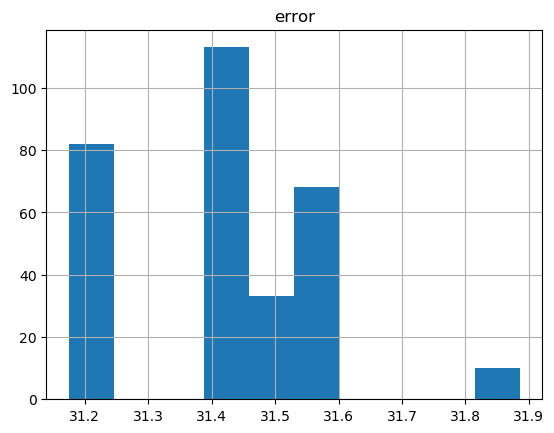

In [15]:
gps_df_op.hist(column='error')

Observing the histogram we can see that the error in terms of distance from known position is in range between (31,32) which is pretty small. And we can also see that majority of the error is approximately the mean error. This may indicate that the location where the data was taken and the reference vlaues may not be the same. And the outliers may be causes due to the precision error.
***

In [16]:
mean_error = gps_df_op['error'].mean()
mean_error

31.436110999204256

In [17]:
medain = gps_df_op['error'].median()
medain

31.444787902396058

The error in terms of position may occur due to the following two reasons:

1. Because of HDOP value
2. The reference laitude and longitude that is derived from google maps may not exactly be where the GPS data was recorded. 
***

In [18]:
# Scatter plot of altitude vs time

fig_1 = px.scatter(gps_df_op, x="UTC", y="Altitude",labels={"Altitude": "Altitude (M)", "UTC": "Time in UTC"}, title="Open Space")
fig_1.show()

## Analysis of stationary data from occuled field
Location - 3411 Washington Street, Jamaica Plains

From google maps -> lat - 42.30835809421112, lon - -71.1060346304591
***

In [19]:
known_lat, known_lon = 42.30835809421112, -71.1060346304591


utm_converted = utm.from_latlon(known_lat,known_lon)

known_easting,known_northing,known_zone,known_letter = utm_converted[0],utm_converted[1],utm_converted[2],utm_converted[3]

In [20]:
# Scaling data
gps_df_oc['modified_northing'] = gps_df_oc['UTM_northing'] - gps_df_oc.UTM_northing[0]
gps_df_oc['modified_easting'] = gps_df_oc['UTM_easting'] - gps_df_oc.UTM_easting[0]

In [21]:
fig = px.scatter(gps_df_oc, x="modified_northing", y="modified_easting", color="HDOP",labels={"modified_northing": "Northing (M)", "modified_easting": "Easting (M)"}, title="Occluded Space")
fig.show()

# Range of position

northing - (-5,0)
eastng - (-1.5,0)

Immediately we can see that the range of GPS data is larger than that one collected in an open field. This shows that in occuled space, the data may be more imprecise. This may be due to the multi-path effect caused by buildings reflecting GPS signals.
***

In [22]:
# Comparision between gps and google map position
x = known_northing - gps_df_oc.UTM_northing[0]
y = known_easting - gps_df_oc.UTM_easting[0]
fig.add_scatter(x=[x],y=[y],name='Actual position')
fig.show()

In [23]:
gps_df_oc['error'] = ((gps_df_oc['modified_northing']-x)**2 + (gps_df_oc['modified_easting']-y)**2)**(1/2)
gps_df_oc

,Time,Header.seq,Header.stamp.secs,Header.stamp.nsecs,Header.frame_id,Latitude,Longitude,Altitude,HDOP,UTM_easting,UTM_northing,UTC,Zone,Letter,modified_northing,modified_easting,error
0,1.675461e+09,50,214613,0,GPS1_Frame,42.308220,-71.106163,36.2 M,1.1,326413.09375,4686146.5,214613.0,19,T,0.0,0.00000,18.687691
1,1.675461e+09,51,214614,0,GPS1_Frame,42.308220,-71.106163,36.2 M,1.1,326413.09375,4686146.5,214614.0,19,T,0.0,0.00000,18.687691
2,1.675461e+09,52,214615,0,GPS1_Frame,42.308220,-71.106163,36.2 M,1.1,326413.09375,4686146.5,214615.0,19,T,0.0,0.00000,18.687691
3,1.675461e+09,53,214616,0,GPS1_Frame,42.308220,-71.106163,36.1 M,1.1,326412.93750,4686146.5,214616.0,19,T,0.0,-0.15625,18.779993
4,1.675461e+09,54,214617,0,GPS1_Frame,42.308220,-71.106163,36.1 M,1.1,326412.93750,4686146.5,214617.0,19,T,0.0,-0.15625,18.779993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,1.675461e+09,441,215243,0,GPS1_Frame,42.308193,-71.106178,13.6 M,1.1,326411.78125,4686143.5,215243.0,19,T,-3.0,-1.31250,21.897283
392,1.675461e+09,442,215244,0,GPS1_Frame,42.308193,-71.106178,13.5 M,1.1,326411.65625,4686143.5,215244.0,19,T,-3.0,-1.43750,21.967746
393,1.675461e+09,443,215245,0,GPS1_Frame,42.308193,-71.106178,13.5 M,1.1,326411.65625,4686143.5,215245.0,19,T,-3.0,-1.43750,21.967746
394,1.675461e+09,444,215246,0,GPS1_Frame,42.308193,-71.106178,13.5 M,1.1,326411.65625,4686143.5,215246.0,19,T,-3.0,-1.43750,21.967746


In [24]:
gps_df_oc["HDOP"].unique()

array([1.10000002, 1.29999995, 1.5       ])

We can aslo see that in occulded space the data contains different HDOP values despite being taken in a stationary spot. This also affects the accuracy and precision of data.
***

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f36a53d39a0>]],
      dtype=object)

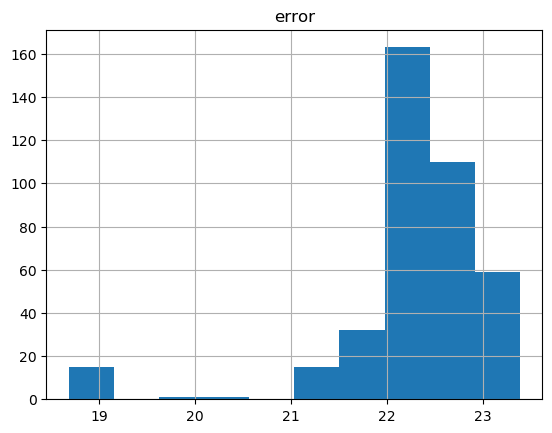

In [25]:
gps_df_oc.hist(column='error')

We can see that the error histograms range is larger (19,23). But we can observe that most errors are in between the vlaue (22,23) which is less that that of one in the open field. This may be because the data values when HDOP was 1.1 was higher in number resulting in more precision than that one in open field where the HDOP was 1.2. Hence we can assume that the data received from GPS was more closer to the reference location. Still difference in actual positon where the data was recorded contributes to the error. And the large range of errors may be due to the difference in HDOP values.
***

In [26]:
mean_error = gps_df_oc['error'].mean()
mean_error

22.238581470804075

In [27]:
medain = gps_df_oc['error'].median()
medain

22.244031308233385

In [28]:
# Scatter plot of altitude vs time

fig_1 = px.scatter(gps_df_oc, x="UTC", y="Altitude",labels={"Altitude": "Altitude (M)", "UTC": "Time in UTC"}, title="Occluded Space")
fig_1.show()

## Analysis of walking data from open field
Location - Scagnoli-Nihill Athletic Complex in Jamaica Plains

From google maps -> lat = 42.30775, lon = -71.10752
***

In [29]:

known_lat, known_lon = 42.30775, -71.10752

utm_converted = utm.from_latlon(42.30775,-71.10752)

known_easting,known_northing,known_zone,known_letter = utm_converted[0],utm_converted[1],utm_converted[2],utm_converted[3]

gps_df_wa.head()

,Time,Header.seq,Header.stamp.secs,Header.stamp.nsecs,Header.frame_id,Latitude,Longitude,Altitude,HDOP,UTM_easting,UTM_northing,UTC,Zone,Letter
0,1.675378e+09,4,224401,0,GPS1_Frame,42.307884,-71.107315,18.7 M,1.2,326317.09375,4686111.5,224401.0,19,T
1,1.675378e+09,5,224402,0,GPS1_Frame,42.307880,-71.107315,18.6 M,1.2,326316.96875,4686111.5,224402.0,19,T
2,1.675378e+09,6,224403,0,GPS1_Frame,42.307877,-71.107323,18.8 M,1.2,326316.53125,4686111.0,224403.0,19,T
3,1.675378e+09,7,224404,0,GPS1_Frame,42.307873,-71.107330,18.8 M,1.2,326316.12500,4686110.0,224404.0,19,T
4,1.675378e+09,8,224405,0,GPS1_Frame,42.307865,-71.107330,18.9 M,1.2,326315.81250,4686109.5,224405.0,19,T


In [30]:
# Scaling data
gps_df_wa['modified_northing'] = gps_df_wa['UTM_northing'] - gps_df_wa.UTM_northing[0]
gps_df_wa['modified_easting'] = gps_df_wa['UTM_easting'] - gps_df_wa.UTM_easting[0]

# Mean square error - 0.999056

Can be seen by hovering over the line in the plot
***

In [31]:
# Scatter plot of nothing vs easting along with the best fit line

fig = px.scatter(gps_df_wa, x="modified_northing", y="modified_easting",trendline='ols', labels={"modified_northing":"Northing (M)","modified_easting": "Easting (M)"}, title="Moving in Open Space")
fig.show()

In [32]:
# Scatter plot of altitude vs time

fig_1 = px.scatter(gps_df_wa, x="UTC", y="Altitude",labels={"Altitude": "Altitude (M)", "UTC": "Time in UTC"}, title="Walking")
fig_1.show()

***
# How do your estimated error values change for stationary vs. moving data?
For stationary data I calculated the eucledian distance between the position from GPS and the reference value. For moving data I used Plotly's inbuilt trendline that uses Add linear Ordinary Least Squares (OLS) regression trendlines which calculates the root mean square error and provides a best fit line.
***

# Can you explain why this result is the case? What does this say about GPS navigation when moving for our receiver?

From the data I collected from GPS, I can see that the GPS can be accurate in representing the direction of movement. Since the data overlaps pretty well with the best fit line with RMSE of 0.99. But that does not show the accuracy of the position data. And as we can see because of HDOP value the precision drops, hence there is no perfect overlap.
***

# What are physically likely source(s) of error in these data sets?

1. Difference in reference data got from google maps and the position where the GPS data was recorded. We should be in exactly in the same location where the google map marked the position to get the actual error.
2. Radio emissions in nearby bands 
3. Atmospheric conditions (less likely since the sky was clear, but included becuase of atmospheric refractions)
4. GPS receiver design feautres/quality
5. Buildings and trees that may cause multi-path effect
***